# Logistic Regression

Logistic Regression is a statistical method used for binary classification tasks, which predicts the probability that a given input belongs to a certain class (labelled as 1) versus another class (labelled as 0). It's one of the simplest and most widely used classification algorithms, especially suited for problems where you have a linear decision boundary between the two classes.

### The Equation

The core of logistic regression is the logistic function, which is used to model the probability that a given input belongs to the class labelled as 1. The logistic function, often called the sigmoid function, outputs a value between 0 and 1, which can be interpreted as a probability. The logistic regression model equation can be expressed as:

$$ p(YU=1) = \frac{1}{1 + e^{-(\beta_0 + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n)}} $$

- $ p(Y=1) $ is the predicted probability that the target variable $Y$ belongs to class 1.
- $ e $ is the base of the natural logarithm.
- $ \beta_0, \beta_1, ..., \beta_n $ are the coefficients of the model, where $ \beta_0 $ is the intercept term, and $ \beta_1, ..., \beta_n $ are the coefficients for the respective features $ X_1, ..., X_n $.

<div class="warning" style='background-color:#E9D8FD; color: #69337A; border: solid #805AD5 4px; border-radius: 4px; padding:0.7em; width:90%'>


**The Logistic Function**

The general form of the logistic function is:

$$ p(X) = \frac{1}{1 + e^{-(\alpha + \beta X)}} $$

The following example illustrates the logistic function graphically:

</div>


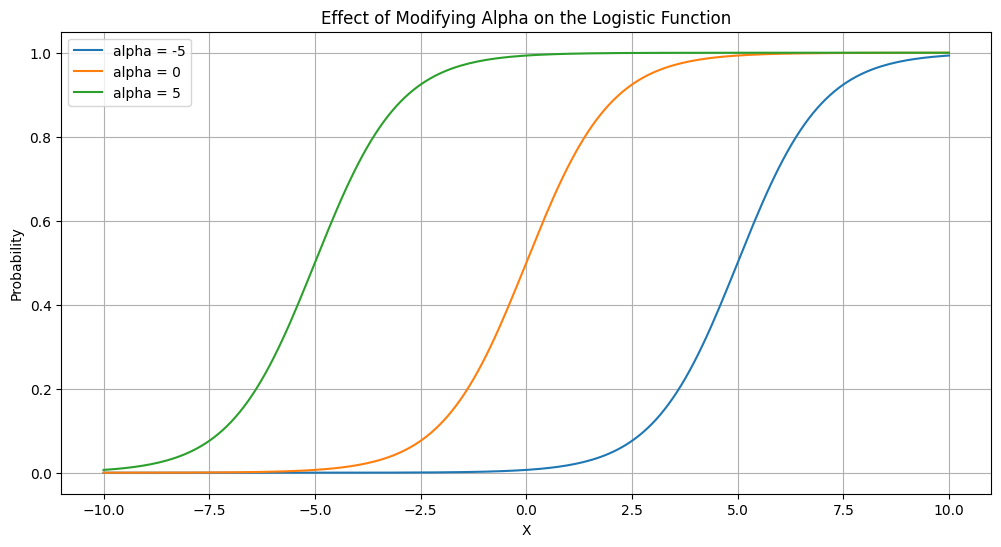

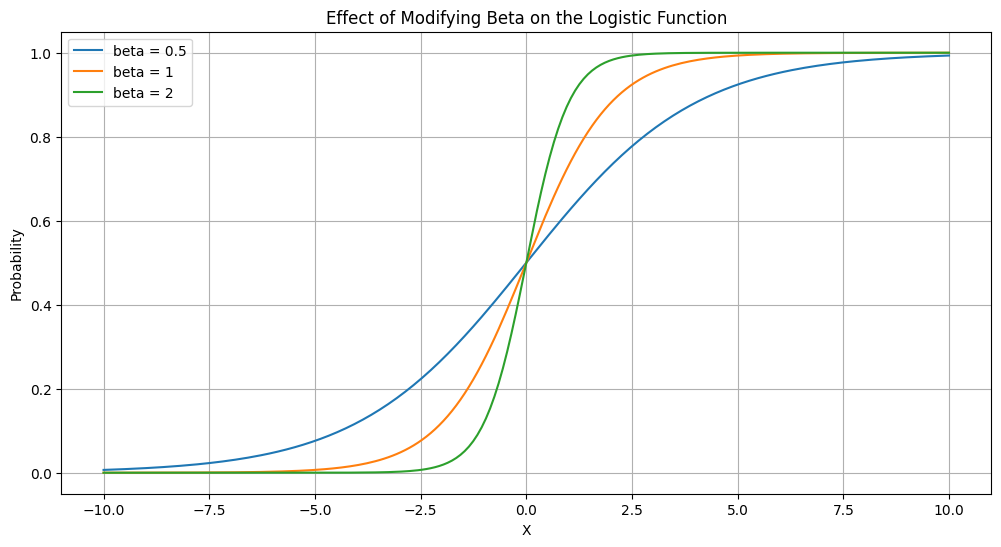

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def logistic_function(x, alpha, beta):
    """
    Logistic function to calculate probabilities.
    x: input feature
    alpha: intercept term
    beta: coefficient term
    """
    return 1 / (1 + np.exp(-(alpha + beta*x)))

# Graph 1: Modifying alpha (intercept term)
x = np.linspace(-10, 10, 200)  # Generate 200 points between -10 and 10
alphas = [-5, 0, 5]  # Different values of alpha to shift the curve

plt.figure(figsize=(12, 6))
for alpha in alphas:
    plt.plot(x, logistic_function(x, alpha, 1), label=f'alpha = {alpha}')

plt.title('Effect of Modifying Alpha on the Logistic Function')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

# Graph 2: Modifying beta (coefficient term)
betas = [0.5, 1, 2]  # Different values of beta to modify the slope

plt.figure(figsize=(12, 6))
for beta in betas:
    plt.plot(x, logistic_function(x, 0, beta), label=f'beta = {beta}')

plt.title('Effect of Modifying Beta on the Logistic Function')
plt.xlabel('X')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()

<div class="warning" style='background-color:#E9D8FD; color: #69337A; border: solid #805AD5 4px; border-radius: 4px; padding:0.7em; width:90%'>

**The Logistic Function (cont'd)**

1. **Effect of Modifying Alpha ($\alpha$)**:
   - The first graph illustrates how changing the intercept term $\alpha$ shifts the logistic curve along the x-axis.
   - Increasing $\alpha$ shifts the curve to the right, indicating that higher x values are needed to achieve the same probability.
   - Decreasing $\alpha$ shifts the curve to the left, lowering the x value threshold for achieving higher probabilities.

2. **Effect of Modifying Beta ($\beta$)**:
   - The second graph shows the effect of changing the slope coefficient $\beta$ on the steepness of the logistic curve.
   - A higher $\beta$ value makes the curve steeper, indicating a more sensitive response to changes in x.
   - A lower $\beta$ value results in a flatter curve, indicating a less sensitive response to x changes.

These graphs demonstrate how the logistic function "squashes" linear combinations of inputs into the [0, 1] range, enabling the calculation of probabilities. Adjusting $\alpha$ and $\beta$ can fine-tune the model's response to different feature values.
</div>

### Loss Function: Binary Cross-Entropy

The loss function used in logistic regression is the binary cross-entropy, also known as log loss. It measures the performance of a classification model whose output is a probability value between 0 and 1. The loss increases as the predicted probability diverges from the actual label. For a dataset with $ N $ observations, the loss function can be written as:

$$ L(\beta) = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(p(x_i)) + (1 - y_i) \log(1 - p(x_i))] $$

- $ y_i $ is the actual label of the $i^{th}$ observation, which can be 0 or 1.
- $ p(x_i) $ is the predicted probability that the $i^{th}$ observation belongs to class 1.
- The sum runs over all $N$ observations in the dataset.

The goal of logistic regression is to find the set of coefficients $ \beta $ that minimize this loss function.

<div class="warning" style='background-color:#E9D8FD; color: #69337A; border: solid #805AD5 4px; border-radius: 4px; padding:0.7em; width:90%'>

### **Understanding Loss Functions**

In machine learning, a **loss function**, also known as a cost function, is a critical concept that quantifies the difference between the predicted values by a model and the actual values in the training data. It essentially measures how well the model is performing, with a lower value indicating a better fit to the data. The goal of training a machine learning model is to find the model parameters (like weights in linear regression or a neural network) that minimize this loss function.

### Why It's Important
- **Guides Model Training**: The loss function guides the optimization process (like gradient descent) by providing a metric to minimize.
- **Model Evaluation**: It helps in evaluating the performance of the model, with different models and hyperparameters being compared based on their loss.

### Examples of Loss Functions

1. **Mean Squared Error (MSE)**: Commonly used in regression tasks. It calculates the average of the squares of the differences between the predicted and actual values.
   - **Equation**: $ \text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 $
   - **Context**: Here, $y_i$ is the actual value, $\hat{y}_i$ is the predicted value, and $n$ is the number of observations.
   - **Use Case**: Ideal for regression problems where you want to penalize larger errors more than smaller ones.

2. **Binary Cross-Entropy**: Often used in binary classification tasks. It measures the distance between two probability distributions - the actual label distribution and the predicted probabilities.
   - **Equation**: $ \text{BCE} = -\frac{1}{n} \sum_{i=1}^{n} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)] $
   - **Context**: $y_i$ is the actual label (0 or 1), and $\hat{y}_i$ is the predicted probability of the instance being in class 1.
   - **Use Case**: Useful when modeling problems where each observation is independent and belongs to one of two classes.


The choice of loss function depends on the specific machine learning task (e.g., regression, classification) and the distribution of the target variable. Selecting the appropriate loss function is fundamental to effectively training and evaluating machine learning models. 

## Overview of the Logistic Regression Algorithm

1. **Initialization**: The model coefficients ($ \beta $) are usually initialized to 0 or a small random number.
2. **Model Training**: During training, logistic regression uses an optimization algorithm (like gradient descent) to minimize the loss function. This involves making predictions using the current coefficients, calculating the error by comparing the predicted probabilities with the actual class labels, and then adjusting the coefficients based on this error.
3. **Updating Coefficients**: The coefficients are updated in a direction that reduces the loss. The learning rate determines the size of the step taken in this direction at each iteration.
4. **Convergence**: The process continues iteratively until the model converges, meaning the reduction in the loss function becomes negligible with further iterations, or until a specified number of iterations is reached.

Certainly! Below is a conceptual explanation of learning algorithms, focusing on gradient descent, accompanied by Python code to generate graphs that illustrate key concepts such as the impact of the gradient and learning rate on the learning process.

<div class="warning" style='background-color:#E9D8FD; color: #69337A; border: solid #805AD5 4px; border-radius: 4px; padding:0.7em; width:90%'>

### **Learning Algorithms and Gradient Descent**

Learning algorithms are procedures that a machine learning model uses to learn from data. One of the most fundamental learning algorithms is **Gradient Descent**, which is used to minimize the loss function of a model by iteratively moving towards the minimum of the loss function.

#### Key Concepts:
- **Gradient**: Represents the slope of the loss function at any point and indicates the direction of steepest ascent. In gradient descent, we're interested in the negative gradient, which points towards the direction of steepest descent.

</div>


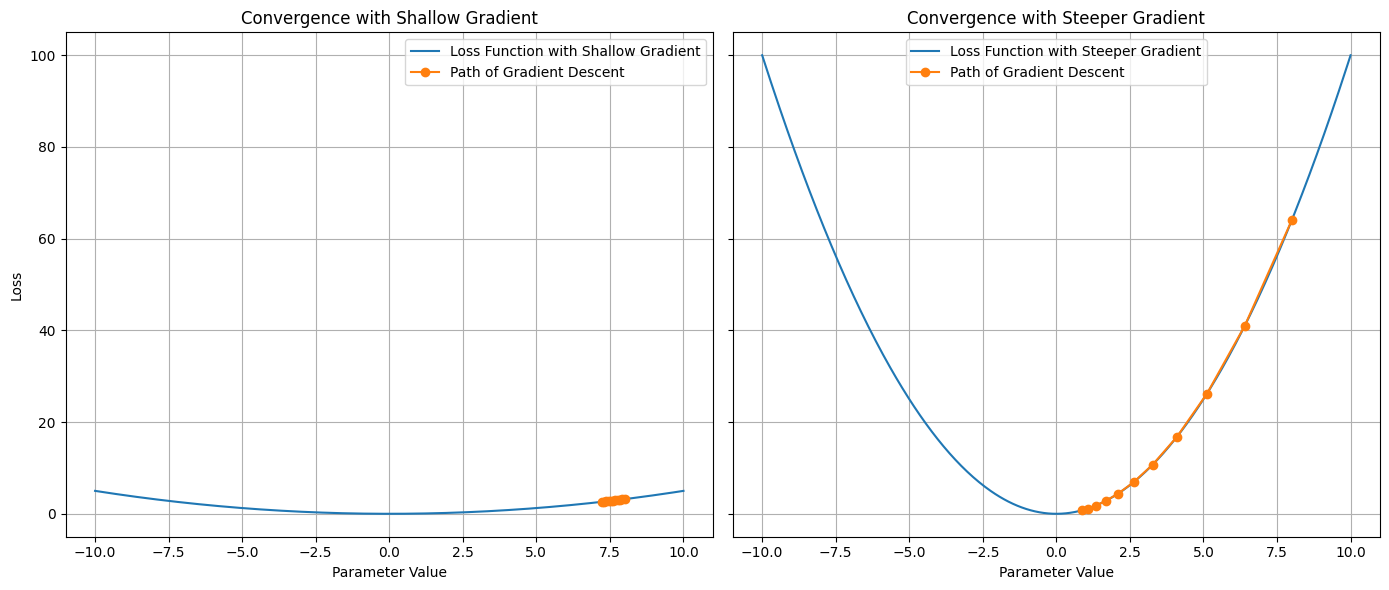

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Gradient descent update function
def gradient_descent_update(start, learning_rate, gradient_func, steps=10):
    x = start
    path = [start]
    for _ in range(steps):
        grad = gradient_func(x)
        x -= learning_rate * grad
        path.append(x)
    return np.array(path)

# Gradient functions
def shallow_gradient(x): return 0.1 * x  # Shallow gradient
def steep_gradient(x): return 2 * x  # Steeper gradient

# Learning rate and starting point
learning_rate = 0.1
start_point = 8

# Generate paths
path_shallow = gradient_descent_update(start_point, learning_rate, shallow_gradient, steps=10)
path_steep = gradient_descent_update(start_point, learning_rate, steep_gradient, steps=10)

# Setup subplots with shared y-axis
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # sharey=True for shared y-axis

# Plot for shallow gradient
axs[0].plot(np.linspace(-10, 10, 400), 0.05 * np.linspace(-10, 10, 400)**2, label='Loss Function with Shallow Gradient')
axs[0].plot(path_shallow, 0.05 * path_shallow**2, marker='o', label='Path of Gradient Descent')
axs[0].set_title('Convergence with Shallow Gradient')
axs[0].set_xlabel('Parameter Value')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].grid(True)

# Plot for steeper gradient
axs[1].plot(np.linspace(-10, 10, 400), np.linspace(-10, 10, 400)**2, label='Loss Function with Steeper Gradient')
axs[1].plot(path_steep, path_steep**2, marker='o', label='Path of Gradient Descent')
axs[1].set_title('Convergence with Steeper Gradient')
axs[1].set_xlabel('Parameter Value')
# axs[1].set_ylabel('Loss')  # Not needed due to shared y-axis
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()



<div class="warning" style='background-color:#E9D8FD; color: #69337A; border: solid #805AD5 4px; border-radius: 4px; padding:0.7em; width:90%'>

- **Learning Rate**: Determines the size of the steps taken towards the minimum. Affects the convergence of the algorithm.

</div>



In [6]:
# Assume a simple gradient descent update
def gradient_descent_update(start, learning_rate, steps=10):
    x = start
    path = [start]
    for _ in range(steps):
        grad = 2 * x  # Derivative of x^2
        x -= learning_rate * grad
        path.append(x)
    return np.array(path)

learning_rates = [0.01, 0.1, 0.95]  # Example learning rates
start_point = -8

plt.figure(figsize=(8, 6))
plt.plot(x, y, label='Loss Function')

for lr in learning_rates:
    path = gradient_descent_update(start_point, lr)
    plt.plot(path, path**2, marker='o', label=f'LR: {lr}')

plt.title('Impact of Learning Rate on Convergence')
plt.xlabel('Parameter Value')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

NameError: name 'y' is not defined

<Figure size 800x600 with 0 Axes>



### Conclusion

Logistic Regression is a powerful yet simple classification algorithm that hinges on the concept of probability and odds. It's widely used for binary classification tasks and serves as a foundation for understanding more complex algorithms. Its interpretability, ease of implementation, and efficacy in linearly separable datasets make it a staple algorithm for many machine learning practitioners.

## Logistic Regression on the Iris Data

The following example illustrates how logistic regression works with two classes from the Iris dataset.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
list(iris)

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [3]:
print(iris.DESCR)  # extra code – it's a bit too long

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
iris.data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [10]:
iris.target.head(3)  # note that the instances are not shuffled

0    0
1    0
2    0
Name: target, dtype: int64

In [11]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = iris.data[["petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=42)

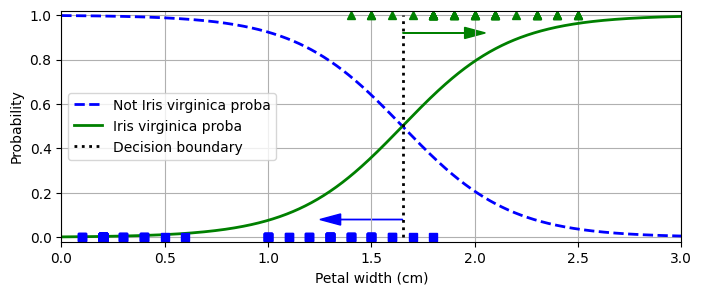

In [10]:
import numpy as np
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)  # reshape to get a column vector
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0, 0]

plt.figure(figsize=(8, 3))  # extra code – not needed, just formatting
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2,
         label="Not Iris virginica proba")
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica proba")
plt.plot([decision_boundary, decision_boundary], [0, 1], "k:", linewidth=2,
         label="Decision boundary")

# extra code – this section beautifies and saves Figure 4–23
plt.arrow(x=decision_boundary, y=0.08, dx=-0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="b", ec="b")
plt.arrow(x=decision_boundary, y=0.92, dx=0.3, dy=0,
          head_width=0.05, head_length=0.1, fc="g", ec="g")
plt.plot(X_train[y_train == 0], y_train[y_train == 0], "bs")
plt.plot(X_train[y_train == 1], y_train[y_train == 1], "g^")
plt.xlabel("Petal width (cm)")
plt.ylabel("Probability")
plt.legend(loc="center left")
plt.axis([0, 3, -0.02, 1.02])
plt.grid()
plt.show()

In [11]:
decision_boundary

1.6516516516516517

In [12]:
log_reg.predict([[1.7], [1.5]])

array([ True, False])

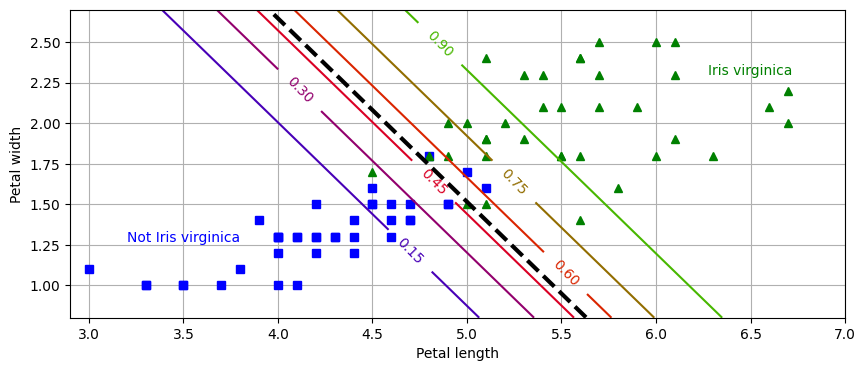

In [13]:
# Illustrates the impact of moving the decision boundary

X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target_names[iris.target] == 'virginica'
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

log_reg = LogisticRegression(C=2, random_state=42)
log_reg.fit(X_train, y_train)

# for the contour plot
x0, x1 = np.meshgrid(np.linspace(2.9, 7, 500).reshape(-1, 1),
                     np.linspace(0.8, 2.7, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]  # one instance per point on the figure
y_proba = log_reg.predict_proba(X_new)
zz = y_proba[:, 1].reshape(x0.shape)

# for the decision boundary
left_right = np.array([2.9, 7])
boundary = -((log_reg.coef_[0, 0] * left_right + log_reg.intercept_[0])
             / log_reg.coef_[0, 1])

plt.figure(figsize=(10, 4))
plt.plot(X_train[y_train == 0, 0], X_train[y_train == 0, 1], "bs")
plt.plot(X_train[y_train == 1, 0], X_train[y_train == 1, 1], "g^")
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.27, "Not Iris virginica", color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", color="g", ha="center")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.axis([2.9, 7, 0.8, 2.7])
plt.grid()
plt.show()

## Handling multiple classes

Logistic Regression is inherently a binary classifier, designed to predict the probability of an instance belonging to one of two classes. However, it can be extended to handle multiclass classification problems through techniques like **One-vs-Rest (OvR)** and **Multinomial Logistic Regression** (also calls **softmax regression**). By default, LogisticRegression in sklearn uses Softmax regression.

### One-vs-Rest (OvR)
One-vs-Rest, also known as One-vs-All (OvA), is a strategy for using binary classification algorithms, like Logistic Regression, for multiclass classification tasks. The basic idea is to train a separate classifier for each class, where each classifier predicts whether an instance belongs to its 'own' class versus 'all other' classes.

- **How It Works**:
  - If there are $N$ classes, $N$ separate Logistic Regression models are trained.
  - Each model is trained to distinguish instances of its own class from instances of all other classes.
  - For a given instance, all $N$ models make a prediction, and the model with the highest predicted probability assigns its class to the instance.

### Multinomial Logistic Regression
Multinomial Logistic Regression, also known as Softmax Regression, extends Logistic Regression to handle multiple classes directly, without having to train multiple binary classifiers.

- **How It Works**:
  - Instead of using the sigmoid function (which outputs probabilities for two classes), the softmax function is used to compute the probabilities of the multiple classes.
  - The softmax function converts the scores (logits) for each class into probabilities by taking the exponential of each score and then normalizing these exponentials by dividing by their sum. This ensures that the probabilities of all classes sum up to 1.
  - The model is trained to maximize the likelihood of the true class by adjusting the weights using a generalization of the logistic loss function, suitable for multiple classes.

### The Softmax Function
For a given instance $x$, the probability that it belongs to class $k$ out of $K$ classes is given by:

$$ P(y=k | x) = \frac{e^{(x^T \beta_k)}}{\sum_{j=1}^{K} e^{(x^T \beta_j)}} $$

- $x^T \beta_k$ is the score (logit) of class $k$ for instance $x$.
- $e^{(x^T \beta_k)}$ is the exponential of the score, ensuring non-negative values.
- The denominator is the sum of exponentials of all class scores, normalizing the probabilities.

### Loss Function for Multinomial Logistic Regression
The loss function used is the cross-entropy loss, generalized for multiple classes. It measures the difference between the predicted probabilities and the actual class labels across all classes and instances.

### Conclusion
Logistic Regression can be effectively used for multiclass classification by employing strategies like One-vs-Rest or by using the Multinomial Logistic Regression approach. The choice between these methods depends on the specific problem, the dataset, and the performance metrics of interest. Multinomial Logistic Regression is particularly neat as it integrates the entire multiclass prediction into a single model, providing a probabilistic interpretation for multiclass predictions.

### **Softmax Regression in sklearn**

In [14]:
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


# Note that 'C' is a 'regularization' parameter which helps to prevent overfitting.
softmax_reg = LogisticRegression(C=30, random_state=42)
softmax_reg.fit(X_train, y_train)

LogisticRegression(C=30, random_state=42)

In [15]:
softmax_reg.predict([[5, 2]])

array([2])

In [16]:
softmax_reg.predict_proba([[5, 2]]).round(2)

array([[0.  , 0.04, 0.96]])

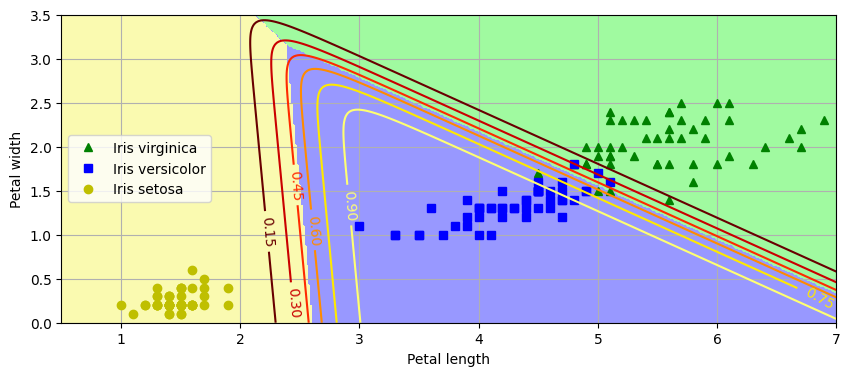

In [18]:
# This illustrates the behavior of the softmax function.  Note  that the decision boundary is constructed from a set of line segments.
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt


custom_cmap = ListedColormap(["#fafab0", "#9898ff", "#a0faa0"])

x0, x1 = np.meshgrid(np.linspace(0, 8, 500).reshape(-1, 1),
                     np.linspace(0, 3.5, 200).reshape(-1, 1))
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y == 2, 0], X[y == 2, 1], "g^", label="Iris virginica")
plt.plot(X[y == 1, 0], X[y == 1, 1], "bs", label="Iris versicolor")
plt.plot(X[y == 0, 0], X[y == 0, 1], "yo", label="Iris setosa")

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap="hot")
plt.clabel(contour, inline=1)
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.legend(loc="center left")
plt.axis([0.5, 7, 0, 3.5])
plt.grid()
plt.show()